In [0]:
!sudo apt install libdb5.3-dev

Reading package lists... Done
Building dependency tree       
Reading state information... Done
Suggested packages:
  db5.3-doc
The following NEW packages will be installed:
  libdb5.3-dev
0 upgraded, 1 newly installed, 0 to remove and 10 not upgraded.
Need to get 762 kB of archives.
After this operation, 3,146 kB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu bionic/main amd64 libdb5.3-dev amd64 5.3.28-13.1ubuntu1 [762 kB]
Fetched 762 kB in 0s (7,484 kB/s)
debconf: unable to initialize frontend: Dialog
debconf: (No usable dialog-like program is installed, so the dialog based frontend cannot be used. at /usr/share/perl5/Debconf/FrontEnd/Dialog.pm line 76, <> line 1.)
debconf: falling back to frontend: Readline
debconf: unable to initialize frontend: Readline
debconf: (This frontend requires a controlling tty.)
debconf: falling back to frontend: Teletype
dpkg-preconfigure: unable to re-open stdin: 
Selecting previously unselected package libdb5.3-dev.
(Rea

In [0]:
!pip3 install --upgrade setuptools
!pip3 install gutenberg

Requirement already up-to-date: setuptools in /usr/local/lib/python3.6/dist-packages (40.8.0)
    100% |████████████████████████████████| 245kB 17.1MB/s 
    100% |████████████████████████████████| 348kB 26.0MB/s 
    100% |████████████████████████████████| 1.0MB 21.2MB/s 
    100% |████████████████████████████████| 51kB 22.8MB/s 
    100% |████████████████████████████████| 573kB 27.2MB/s 
  Stored in directory: /root/.cache/pip/wheels/8e/cd/75/4bc6f16541a1b7a69b02168da567695b2271c23ac4a0a0a453
  Stored in directory: /root/.cache/pip/wheels/11/b8/b3/fa84db10bf8c563e4ba1a72837a0946d123f12adb34b164bf5
  Stored in directory: /root/.cache/pip/wheels/f9/71/46/604b8a4f0a04b513f5799c974b556c1de19a70fde41d25672b
  Stored in directory: /root/.cache/pip/wheels/15/35/25/dbcb848832ccb1a4b4ad23f529badfd3bce9bf88017f7ca510
Successfully built gutenberg bsddb3 alembic Mako


In [0]:
!pwd

/content


In [0]:
from google.colab import auth
auth.authenticate_user()

from google.colab import drive
drive.mount('/content/gdrive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/gdrive


In [0]:
#!fusermount -u gdrive
#!rmdir gdrive

fusermount: failed to unmount /content/gutenberg_data: Invalid argument


In [0]:
!ln -s /content/gdrive/My\ Drive/gutenberg/gutenberg_data /content/gutenberg_data

In [0]:
!ls -al /content/gutenberg_data/metadata/metadata.db

ls: cannot access '/content/gutenberg_data/metadata/metadata.db': No such file or directory


In [0]:
try:
    GUTENBERG = True
    from gutenberg.acquire import load_etext
    from gutenberg.query import get_etexts, get_metadata
    from gutenberg.acquire import get_metadata_cache
    from gutenberg.acquire.text import UnknownDownloadUriException
    from gutenberg.cleanup import strip_headers
    from gutenberg._domain_model.exceptions import CacheAlreadyExistsException
except ImportError:
    GUTENBERG = False
    print('Gutenberg is not installed. See instructions at https://pypi.python.org/pypi/Gutenberg')
#import tensorflow as tf
from tensorflow.keras import Input
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.layers import LSTM
from tensorflow.keras.layers import TimeDistributed
import tensorflow.keras.callbacks
import tensorflow.keras.backend as K
import scipy.misc
import json

import os, sys
import re
import PIL
from PIL import ImageDraw

from tensorflow.keras.optimizers import RMSprop
import random
import numpy as np
import tensorflow as tf
from keras.utils import get_file

from IPython.display import clear_output, Image, display, HTML
try:
    from io import BytesIO
except ImportError:
    from StringIO import StringIO as BytesIO

In [0]:
if GUTENBERG:
    cache = get_metadata_cache()
    try:
        cache.populate()
    except CacheAlreadyExistsException as e:
        print(e)
        pass

location: /root/gutenberg_data/metadata/metadata.db


In [0]:
shakespeare_id = 100
casanova_id = 2981 
clarissa_ids = [9296, 9798, 9881, 10462, 10799, 11364, 11889, 12180, 12398]

def load_etext_from(ids, filter_func):
  etext = '\n'.join([filter_func(strip_headers(load_etext(id))) \
                     for id in ids])
  return etext

In [0]:
shakespeare = load_etext_from([shakespeare_id], lambda text: text.split('\nTHE END', 1)[-1])
print(len(shakespeare))
shakespeare[:1000]

5528070


'\n\n\n\nALL’S WELL THAT ENDS WELL\n\n\nby William Shakespeare\n\n\n\nContents\n\nACT I\nScene I. Rossillon. A room in the Countess’s palace.\nScene II. Paris. A room in the King’s palace.\nScene III. Rossillon. A Room in the Palace.\n\n\nACT II\nScene I. Paris. A room in the King’s palace.\nScene II. Rossillon. A room in the Countess’s palace.\nScene III. Paris. The King’s palace.\nScene IV. Paris. The King’s palace.\nScene V. Another room in the same.\n\n\nACT III\nScene I. Florence. A room in the Duke’s palace.\nScene II. Rossillon. A room in the Countess’s palace.\nScene III. Florence. Before the Duke’s palace.\nScene IV. Rossillon. A room in the Countess’s palace.\nScene V. Without the walls of Florence.\nScene VI. Camp before Florence.\nScene VII. Florence. A room in the Widow’s house.\n\n\nACT IV\nScene I. Without the Florentine camp.\nScene II. Florence. A room in the Widow’s house.\nScene III. The Florentine camp.\nScene IV. Florence. A room in the Widow’s house.\nScene V. Ros

In [0]:
casanova = load_etext_from([casanova_id], lambda text: text.split('\nCASANOVA AT DUX', 1)[-1]) # from main contents
print(len(casanova))
casanova[:1000]

6685264


'\n\n An Unpublished Chapter of History, By Arthur Symons\n\n I\n The Memoirs of Casanova, though they have enjoyed the popularity of a bad reputation, have never had justice done to them by serious students of literature, of life, and of history. One English writer, indeed, Mr. Havelock Ellis, has realised that ‘there are few more delightful books in the world,’ and he has analysed them in an essay on Casanova, published in Affirmations, with extreme care and remarkable subtlety. But this essay stands alone, at all events in English, as an attempt to take Casanova seriously, to show him in his relation to his time, and in his relation to human problems. And yet these Memoirs are perhaps the most valuable document which we possess on the society of the eighteenth century; they are the history of a unique life, a unique personality, one of the greatest of autobiographies; as a record of adventures, they are more entertaining than Gil Blas, or Monte Cristo, or any of the imaginary travel

In [0]:
clarissa = load_etext_from(clarissa_ids, lambda text: text.split('\nTHE HISTORY OF CLARISSA HARLOWE', 1)[-1]) # from main contents
print(len(clarissa))
clarissa[:1000]

5173348


"\n\n\n\n\nLETTER I\n\nMISS ANNA HOWE, TO MISS CLARISSA HARLOWE JAN 10.\n\n\nI am extremely concerned, my dearest friend, for the disturbances that\nhave happened in your family. I know how it must hurt you to become\nthe subject of the public talk: and yet, upon an occasion so generally\nknown, it is impossible but that whatever relates to a young lady, whose\ndistinguished merits have made her the public care, should engage every\nbody's attention. I long to have the particulars from yourself; and of\nthe usage I am told you receive upon an accident you could not help; and\nin which, as far as I can learn, the sufferer was the aggressor.\n\nMr. Diggs, the surgeon, whom I sent for at the first hearing of the\nrencounter, to inquire, for your sake, how your brother was, told me,\nthat there was no danger from the wound, if there were none from the\nfever; which it seems has been increased by the perturbation of his\nspirits.\n\nMr. Wyerley drank tea with us yesterday; and though he is 

In [0]:
# TODO : global char_to_index 추가 
def get_chars_index(etext):
  chars = list(sorted(set(etext)))
  char_to_idx = {ch: idx for idx, ch in enumerate(chars)}
  return chars, char_to_idx

def generate_meta_from(etext, model_name, chunk_size=160):
  etext_meta = {}
  etext_meta['model_name'] = model_name
  etext_meta['char'], etext_meta['char_to_idx'] = get_chars_index(etext)
  etext_meta['chunk_size'] = chunk_size
  return etext_meta
  
shakespeare_meta = generate_meta_from(shakespeare, 'shakespeare')
casanova_meta = generate_meta_from(casanova, 'casanova')
clarissa_meta = generate_meta_from(clarissa, 'clarissa')

In [0]:
def char_rnn_model(chunk_size, num_chars, num_layers, num_nodes=512, dropout=0.1):
    input = Input(shape=(chunk_size, num_chars), name='input')
    prev = input
    for i in range(num_layers):
        lstm = LSTM(num_nodes, return_sequences=True, name='lstm_layer_%d' % (i + 1))(prev)
        if dropout:
            prev = Dropout(dropout)(lstm)
        else:
            prev = lstm
    dense = TimeDistributed(Dense(num_chars, name='dense', activation='softmax'))(prev)
    model = Model(inputs=[input], outputs=[dense])
    optimizer = tf.train.RMSPropOptimizer(learning_rate=0.01)
    model.compile(loss='categorical_crossentropy', optimizer=optimizer, metrics=['accuracy'])
    return model


In [0]:
# prediction from saved weights
!ls -al /content/gutenberg_data/models/
basepath = '/content/gutenberg_data/models/02/'

def load_model(basepath, model_meta):
  model = char_rnn_model(None, len(model_meta['char']), num_layers=2, num_nodes=640, dropout=0) 
  model.load_weights(basepath + "/" + model_meta['model_name'] + '_weights.h5')
  return model
 
prediction_models = {
    'shakespeare' : load_model(basepath, shakespeare_meta),
    'casanova' : load_model(basepath, casanova_meta),
    'clarissa' : load_model(basepath, clarissa_meta),
}
#prediction_model = load_model(basepath, shakespeare_meta)  
#prediction_model = load_model(basepath, casanova_meta)
#prediction_model = load_model(basepath, clarissa_meta)
prediction_models['shakespeare'].summary()

total 8
drwx------ 2 root root 4096 Mar  2 06:08 01
drwx------ 2 root root 4096 Mar  2 06:09 02
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input (InputLayer)           (None, None, 94)          0         
_________________________________________________________________
lstm_layer_1 (LSTM)          (None, None, 640)         1881600   
_________________________________________________________________
lstm_layer_2 (LSTM)          (None, None, 640)         3279360   
_________________________________________________________________
time_distributed_4 (TimeDist (None, None, 94)          60254     
Total params: 5,221,214
Trainable params: 5,221,214
Non-trainable params: 0
_________________________________________________________________


In [0]:
def generate_output(model, training_text, model_meta, start_index=None, diversity=None, amount=400):
    CHUNK_SIZE = model_meta['chunk_size']
    if start_index is None:
        start_index = random.randint(0, len(training_text) - CHUNK_SIZE - 1)
    print("start_index : %s" % start_index)
    generated = training_text[start_index: start_index + CHUNK_SIZE]
    yield generated + '#'
    for i in range(amount):
        x = np.zeros((1, len(generated), len(model_meta['char'])))
        for t, char in enumerate(generated):
            x[0, t, model_meta['char_to_idx'][char]] = 1.
        preds = model.predict(x, verbose=0)[0]
        if diversity is None:
            next_index = np.argmax(preds[len(generated) - 1])
        else:
            preds = np.asarray(preds[len(generated) - 1]).astype('float64')
            preds = np.log(preds) / diversity
            exp_preds = np.exp(preds)
            preds = exp_preds / np.sum(exp_preds)
            probas = np.random.multinomial(1, preds, 1)
            next_index = np.argmax(probas)     
        next_char = model_meta['char'][next_index]
        yield next_char

        generated += next_char
    return generated
        

In [0]:
for ch in generate_output(prediction_models['casanova'], casanova, model_meta=casanova_meta, amount=1000, start_index=6093314):
    sys.stdout.write(ch)
print()

start_index : 6093314
o to tell him that I wanted to start directly after dinner. This order acted on Betty like magic.

“You mean to go as far as Centino, I suppose,” said the man. #“What do you mean?”

“No, I should like to be in the same place.”

“That will do nicely.”

“I will do so, and I am sure you will be able to get a hundred thousand francs in company.”

“I will do so, and I shall not let her come and see me.”

“I will tell you the whole story.”

“You are right, and I am sure you will be able to get a hundred thousand francs in company.”

“I am delighted to hear it; the only condition is what I can do to consent to any other place. I told her that I should not have the honour of calling on you to-morrow, and I shall be delighted to see you.”

“I am glad to hear it, but I will tell you where you are going.”

“I am delighted to hear it; the only condition is what she will say when she sees me the whole affair.”

“I am glad to hear it; but you must agree with me that I am not a 

In [0]:
for ch in generate_output(prediction_models['shakespeare'], casanova, model_meta=shakespeare_meta, amount=1000, start_index=6093314):
    sys.stdout.write(ch)
print()

start_index : 6093314
o to tell him that I wanted to start directly after dinner. This order acted on Betty like magic.

“You mean to go as far as Centino, I suppose,” said the man. #I will tell you the
sleeping of the country, and the seventh and fire; and there is a
      better place than a star, and there is more to the worst of all
      than the wind.


      DON PEDRO.
      Why, what a candle may be hang’d!


      DON PEDRO.
      Why, what a woman would that be the devil was set at the last,
      and there is no time to be a sin-wounded beard, the contrary was here at the basest.


      DON PEDRO.
      Why, what a corrust house is this! What are you?


      CLAUDIO.
      I will not hear you speak to me, I was conceived against
      you were better than your wisdom. I have been set in your way, and
      he shall not live.


      DON PEDRO.
      Why, what is he?


      DON PEDRO.
      Why, what a corrust name!


      BORACHIO.
      I cannot tell what you will not c

In [0]:
def find_python(rootdir):
    matches = []
    for root, dirnames, filenames in os.walk(rootdir):
        for fn in filenames:
            if fn.endswith('.py'):
                matches.append(os.path.join(root, fn))

    return matches
#  + find_python(os.path.join(sys.executable.rsplit('/', 2)[0], 'lib'))
srcs = find_python(random.__file__.rsplit('/', 1)[0])
len(srcs)

625

In [0]:
def replacer(value):
    value = ''.join(ch for ch in value if ord(ch) < 127)
    if not ' ' in value:
        return value
    if sum(1 for ch in value if ch.isalpha()) > 6:
        return 'MSG'
    return value


def replace_literals(st):
    res = []
    start_text = start_quote = i = 0
    quote = ''
    while i < len(st):
        if quote:
            if st[i: i + len(quote)] == quote:
                quote = ''
                start_text = i
                res.append(replacer(st[start_quote: i]))
        elif st[i] in '"\'':
            quote = st[i]
            if i < len(st) - 2 and st[i + 1] == st[i + 2] == quote:
                quote = 3 * quote
            start_quote = i + len(quote)
            res.append(st[start_text: start_quote])
        if st[i] == '\n' and len(quote) == 1:
            start_text = i
            res.append(quote)
            quote = ''
        if st[i] == '\\':
            i += 1
        i += 1
    return ''.join(res) + st[start_text:]

#replace_literals('print("hel\\"lo")') + replace_literals("print('hel\\'lo world')")
replace_literals('this = "wrong\n')

'this = ""\n'

In [0]:
COMMENT_RE = re.compile('#.*')
python_code = []
for fn in srcs:
    try:
        with open(fn, 'r') as fin:
            src = fin.read()
    except UnicodeDecodeError:
        print('Could not read %s' % fn)
    src = replace_literals(src)
    src = COMMENT_RE.sub('', src)
    python_code.append(src)

python_code = '\n\n\n'.join(python_code)
len(python_code)

6328011

In [0]:
py_chars = list(sorted(set(python_code)))
py_char_to_idx = {ch: idx for idx, ch in enumerate(py_chars)}
len(py_chars)

97

In [0]:
py_model = char_rnn_model(160, len(py_chars), num_layers=2, num_nodes=640, dropout=0)
py_model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input (InputLayer)           (None, 160, 97)           0         
_________________________________________________________________
lstm_layer_1 (LSTM)          (None, 160, 640)          1889280   
_________________________________________________________________
lstm_layer_2 (LSTM)          (None, 160, 640)          3279360   
_________________________________________________________________
time_distributed_6 (TimeDist (None, 160, 97)           62177     
Total params: 5,230,817
Trainable params: 5,230,817
Non-trainable params: 0
_________________________________________________________________


In [0]:
py_model = tf.contrib.tpu.keras_to_tpu_model(py_model, strategy=tf.contrib.tpu.TPUDistributionStrategy(
    tf.contrib.cluster_resolver.TPUClusterResolver(TPU_ADDRESS)))

INFO:tensorflow:Querying Tensorflow master (grpc://10.65.67.106:8470) for TPU system metadata.
INFO:tensorflow:Found TPU system:
INFO:tensorflow:*** Num TPU Cores: 8
INFO:tensorflow:*** Num TPU Workers: 1
INFO:tensorflow:*** Num TPU Cores Per Worker: 8
INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:CPU:0, CPU, -1, 11502498185262799519)
INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:XLA_CPU:0, XLA_CPU, 17179869184, 11588889170251908459)
INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:0, TPU, 17179869184, 15484636259604477500)
INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:1, TPU, 17179869184, 6188258309789351709)
INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:2, TPU, 17179869184, 17618968535966954990)
INFO:tensorflow:*** Available Device: _DeviceAttribute

In [0]:
early = tensorflow.keras.callbacks.EarlyStopping(monitor='loss',
                              min_delta=0.03,
                              patience=10,
                              verbose=0, mode='auto')

BATCH_SIZE = 256
py_model.fit_generator(
    data_generator(python_code, py_char_to_idx, batch_size=BATCH_SIZE, chunk_size=160),
    epochs=40,
    callbacks=[early,],
    steps_per_epoch=int(2 * len(python_code) / (BATCH_SIZE * 160)),
    verbose=2
)

Epoch 1/40
INFO:tensorflow:New input shapes; (re-)compiling: mode=train (# of cores 8), [TensorSpec(shape=(32,), dtype=tf.int32, name='core_id_50'), TensorSpec(shape=(32, 160, 97), dtype=tf.float32, name='input_140'), TensorSpec(shape=(32, 160, 97), dtype=tf.float32, name='time_distributed_6_target_30')]
INFO:tensorflow:Overriding default placeholder.
INFO:tensorflow:Remapping placeholder for input
INFO:tensorflow:Started compiling
INFO:tensorflow:Finished compiling. Time elapsed: 18.36404800415039 secs
INFO:tensorflow:Setting weights on TPU model.
 - 150s - loss: 3.2331 - acc: 0.3467
Epoch 2/40
 - 115s - loss: 2.8069 - acc: 0.3642
Epoch 3/40
 - 115s - loss: 3.0248 - acc: 0.3544
Epoch 4/40
 - 114s - loss: 3.0548 - acc: 0.3566
Epoch 5/40
 - 114s - loss: 2.8092 - acc: 0.3768
Epoch 6/40
 - 114s - loss: 1.3388 - acc: 0.6687
Epoch 7/40
 - 113s - loss: 1.0017 - acc: 0.7540
Epoch 8/40
 - 114s - loss: 0.8883 - acc: 0.7841
Epoch 9/40
 - 115s - loss: 0.8553 - acc: 0.7972
Epoch 10/40
 - 116s - lo

In [0]:
with open('/content/gutenberg_data/models/02/py_code.json', 'w') as fout:
    json.dump({
        'chars': ''.join(py_chars),
        'char_to_idx': py_char_to_idx,
        'chunk_size': 160,
    }, fout)
py_model.save('/content/gutenberg_data/models/02/py_code.h5')
py_model.save_weights('/content/gutenberg_data/models/02/py_code_weights.h5')

INFO:tensorflow:Copying TPU weights to the CPU
INFO:tensorflow:Copying TPU weights to the CPU


In [0]:
prediction_model = char_rnn_model(None, len(py_chars), num_layers=2, num_nodes=640, dropout=0) 
prediction_model.load_weights('/content/gutenberg_data/models/02/py_code_weights.h5')
prediction_model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input (InputLayer)           (None, None, 97)          0         
_________________________________________________________________
lstm_layer_1 (LSTM)          (None, None, 640)         1889280   
_________________________________________________________________
lstm_layer_2 (LSTM)          (None, None, 640)         3279360   
_________________________________________________________________
time_distributed_21 (TimeDis (None, None, 97)          62177     
Total params: 5,230,817
Trainable params: 5,230,817
Non-trainable params: 0
_________________________________________________________________


In [0]:
def generate_code(model, start_with='\ndef ', end_with='\n\n', diversity=1.0):
    generated = start_with
    yield generated
    for i in range(2000):
        x = np.zeros((1, len(generated), len(py_chars)))
        for t, char in enumerate(generated):
            x[0, t, py_char_to_idx[char]] = 1.
        preds = model.predict(x, verbose=0)[0]
        
        preds = np.asarray(preds[len(generated) - 1]).astype('float64')
        preds = np.log(preds) / diversity
        exp_preds = np.exp(preds)
        preds = exp_preds / np.sum(exp_preds)
        probas = np.random.multinomial(1, preds, 1)
        next_index = np.argmax(probas)        
        next_char = py_chars[next_index]
        yield next_char

        generated += next_char
        if generated.endswith(end_with):
            break

st = ''
for i in range(20):
    for ch in generate_code(prediction_model):
        sys.stdout.write(ch)
        st += ch
    print()



def itemgee2_array(*xerr = hashlib.m = heap[action]
    alias_gc                                       
    raise AssertionError("MSG"
GE = byte_inde = re.compile(r'[a-zA-M]")
except Impo =errormsg:
    standardMset = {}



def masterchr - cnf={MSGt
    def window(name):
        """MSG"""'%s' % iConn and '    SinNodetUs els ' + nazename
    else:
        names = names.split(".")
    rematedihten = 1



def sav i 2):
retur sorted(x for x in x + 1):
    rc = sre (int(word))*1000)
    return t.lower()



def _rmdefault_t prog.1set_pa <Peerhas(p as Ftpcp2, p2c2(peermcos, s, end decode_q.CRED_ERROR)



def r <= 1:
    reason = b'H' not in mode
    file_or_future.cail(result or [] i = is_finalizer(cha modname)
fro(q, data):
    attr, va_w_items = html.entities()
    if default_header_map is not None and cpu_noop():
        new_comps.append(tosize)
        code = locale_aliaf
        loadfile_l = filename
    else:
        compiler_type = 'mi */x + theye' | th)
        target_vexup = ''.join

In [0]:
BATCH_SIZE = 512

flat_model = char_rnn_model(160, len(py_chars), num_layers=1, num_nodes=512, dropout=0)
flat_model = tf.contrib.tpu.keras_to_tpu_model(flat_model, strategy=tf.contrib.tpu.TPUDistributionStrategy(
    tf.contrib.cluster_resolver.TPUClusterResolver(TPU_ADDRESS)))

early = tf.keras.callbacks.EarlyStopping(monitor='loss',
                              min_delta=0.03,
                              patience=3,
                              verbose=0, mode='auto')



INFO:tensorflow:Querying Tensorflow master (grpc://10.65.67.106:8470) for TPU system metadata.
INFO:tensorflow:Found TPU system:
INFO:tensorflow:*** Num TPU Cores: 8
INFO:tensorflow:*** Num TPU Workers: 1
INFO:tensorflow:*** Num TPU Cores Per Worker: 8
INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:CPU:0, CPU, -1, 11502498185262799519)
INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:XLA_CPU:0, XLA_CPU, 17179869184, 11588889170251908459)
INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:0, TPU, 17179869184, 15484636259604477500)
INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:1, TPU, 17179869184, 6188258309789351709)
INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:2, TPU, 17179869184, 17618968535966954990)
INFO:tensorflow:*** Available Device: _DeviceAttribute

In [0]:
flat_model.fit_generator(
    data_generator(python_code, py_char_to_idx, batch_size=BATCH_SIZE, chunk_size=160),
    epochs=40,
    callbacks=[early,],
    steps_per_epoch=int(2 * len(python_code) / (BATCH_SIZE * 160)),
    verbose=2
)

Epoch 1/40
 - 53s - loss: 0.8566 - acc: 0.8016
Epoch 2/40
 - 52s - loss: 0.8543 - acc: 0.8025
Epoch 3/40
 - 52s - loss: 0.8442 - acc: 0.8046
Epoch 4/40
 - 52s - loss: 0.8321 - acc: 0.8079


In [0]:
example_code = 'if a == 2:\n    b=1\nelse:\n    b=2\n'
#example_code = 'a=(2 * 3)\nb=(4 * 6 + 7)\nreturn C'

def activations(model, code):
    x = np.zeros((1, len(code), len(py_char_to_idx)))
    for t, char in enumerate(code):
        x[0, t, py_char_to_idx[char]] = 1.
    output = model.get_layer('lstm_layer_1').output
    f = K.function([model.input], [output])
    return f([x])[0][0]

act = activations(flat_model, example_code)
act.shape

(33, 512)

In [0]:
def interesting_neurons(act):
    res = []
    for n in np.argmax(act, axis=1):
        if not n in res:
            res.append(n)
    return res

neurons = interesting_neurons(act)
len(neurons)

17

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:8: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  


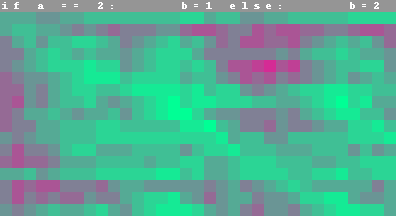

In [0]:
def visualize_neurons(neurons, code, act, cell_size=12):
    img = np.full((len(neurons) + 1, len(code), 3), 128)
    scores = (act[:, neurons].T + 1) / 2
    img[1:, :, 0] = 255 * (1 - scores)
    img[1:, :, 1] = 255 * scores

    f = BytesIO()
    img = scipy.misc.imresize(img, float(cell_size), interp='nearest')
    pil_img = PIL.Image.fromarray(img)
    draw = ImageDraw.Draw(pil_img)
    for idx, ch in enumerate(code):
        draw.text((idx * cell_size + 2, 0), ch)
    pil_img.save(f, 'png')
    return Image(data=f.getvalue())

img = visualize_neurons(neurons, example_code, act)
display(img)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:8: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  


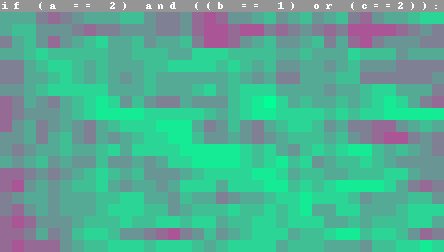

In [0]:
def image_for_code(code):
    act = activations(flat_model, code)
    neurons = interesting_neurons(act)
    return visualize_neurons(neurons, code, act)

display(image_for_code('if (a == 2) and ((b == 1) or (c==2)):'))

In [0]:
code = 'if (a == 2) and ((b == 1) or (c==2)):'
mask = '   ________     ____________________ '
act = activations(flat_model, code)
positive = [idx for idx, ch in enumerate(mask) if ch == '_']
negative = [idx for idx, ch in enumerate(mask) if ch != '_']

neurons = np.argsort(act[positive].sum(axis=0) - act[negative].sum(axis=0))[-5:]

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:8: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  


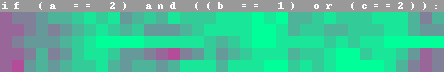

In [0]:
img = visualize_neurons(neurons, code, act)
display(img)

In [0]:
neurons

array([239, 247,  18,   7,   8])

In [0]:
act[negative, 108].sum()

0.06521046

In [0]:
x0 = 0
x1 = 0
for idx, ch in enumerate(mask):
    if ch == '_':
        x0 += act[idx, 108]
    else:
        x1 += act[idx, 108]
x0, x1

(0.19161548878764734, 0.06521046429406852)